<a href="https://colab.research.google.com/github/Crissalyn/CCINSYSL_ASSIGNMENT_COM-DF211/blob/main/exercise_5_a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 5 A

One of the classic public datasets used to demonstrate binary classification is the titanic dataset which lists 891 of the the passengers aboard the RMS Titanic when it sank on April 15, 1912.

The dataset includes the name of each passenger as well as other information such as the fare class, the fare price, the person's age and gender, and whether that person survived the sinking of the ship.

In this example, you will build a binary-classification model that predicts whether a passenger will survive. We will use logistic regression as the learning algorithm.

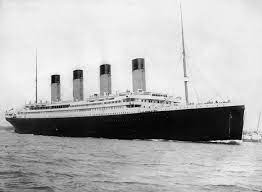

In [194]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [195]:
df = load_dataset("titanic")

#### 1. Filter the dataset to remove columns that won't be used,

In [196]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [197]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [198]:
# put your answer here
df = df[['survived', 'age', 'sex', 'pclass']]



#### 2. Use `get_dummies()` function to convert the "Sex" and "Pclass" columns into ones and zeroes.

In [199]:
# put your answer here
df = pd.get_dummies(df, columns=['sex', 'pclass'])
df.head()

,survived,age,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,0,22.0,0,1,0,0,1
1,1,38.0,1,0,1,0,0
2,1,26.0,1,0,0,0,1
3,1,35.0,1,0,1,0,0
4,0,35.0,0,1,0,0,1


#### 3. Remove rows with missing values.

In [200]:
# put your answer here
df.dropna(inplace=True)
df.head()

,survived,age,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,0,22.0,0,1,0,0,1
1,1,38.0,1,0,1,0,0
2,1,26.0,1,0,0,0,1
3,1,35.0,1,0,1,0,0
4,0,35.0,0,1,0,0,1


#### 4. Split the dataset into a training and test set.

In [201]:
# put your answer here
x = df.drop('survived', axis=1)
y = df['survived']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, stratify=y, random_state=0)

#### 5. Create a new instance of the Logistic Regression class

In [202]:
# put your answer here
model = LogisticRegression(random_state=0)

#### 6. Train the model using the `fit()` method

In [203]:
# put your answer here
model.fit(x_train, y_train)

LogisticRegression(random_state=0)

#### 7. Get an accuracy score.

In [204]:
# put your answer here
model.score(x_test, y_test)

0.8333333333333334

### Use the model to make predictions

#### 8. Use  the model to predict whether a 30-year-old female traveling in first class will survive the voyage.

In [205]:
# put your answer here
female = [[ 30, 1, 0, 1, 0, 0]]
model.predict(female)[0]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


1

#### 9. What is the probability that a 30-year-old female traveling in first class will survive?

In [206]:
# put your answer here
survpred =  model.predict_proba(female)[0][1]
print(f'Probability of survival of a 30-year-old female traveling in first class: {survpred:.1%}')

Probability of survival of a 30-year-old female traveling in first class: 92.0%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


#### 10. What is the probability that a 60-year-old male traveling in third class will survive??

In [207]:
# put your answer here
male = [[60, 0, 1, 0, 0 , 1]]
survpred =  model.predict_proba(male)[0][1]
print(f'Probability of survival of a 60-year-old male traveling in third class: {survpred:.1%}')

Probability of survival of a 60-year-old male traveling in third class: 2.9%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
